In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
california = fetch_california_housing()
type(california)

sklearn.utils._bunch.Bunch

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [6]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [9]:
y = data['Price']
X = data.drop('Price', axis=1)

In [10]:
y.shape, X.shape

((20640,), (20640, 8))

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.4366932931343246
HouseAge 0.00943577803323826
AveRooms -0.10732204139090355
AveBedrms 0.6450656935198116
Population -3.976389421233581e-06
AveOccup -0.0037865426549708674
Latitude -0.42131437752714335
Longitude -0.43451375467477726


In [12]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.941920207184396


In [13]:
y_pred = model.predict(X)
print(y_pred[:5])
print(y[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


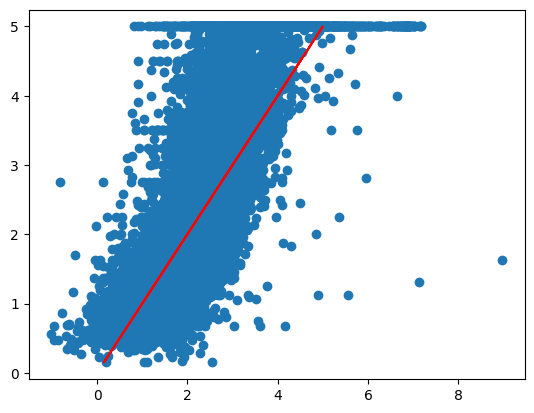

In [14]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [15]:
model.score(X, y)

0.606232685199805

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3).fit_transform(X)
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

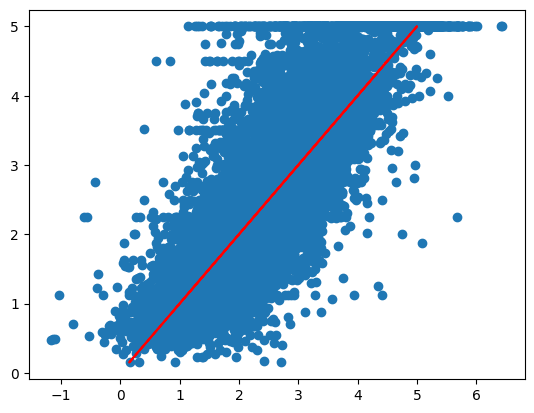

In [17]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')
plt.show()

In [18]:
polynomial.score(poly, y)

0.7286583856416735

# EXTRA TASKS

# 1

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
x_ = poly

y_pred = polynomial.predict(x_)
y_true = np.ravel(y)
residuals = y_true - np.ravel(y_pred)
n = len(y_true)
p = x_.shape[1]

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
mape = np.mean(np.abs((y_true - np.ravel(y_pred)) / np.where(y_true==0, 1e-8, y_true))) * 100
r2 = r2_score(y_true, y_pred)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE (%):", mape)
print("R2:", r2)
print("Adjusted R2:", adj_r2)

MSE: 0.3613050080235117
RMSE: 0.6010865229095655
MAE: 0.4284215198800873
MAPE (%): 25.171082910836066
R2: 0.7286583856416735
Adjusted R2: 0.7264716431209584


# 2

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def evaluate_and_plot(model, X_data, y_data, title):
    model.fit(X_data, y_data)
    y_pred = model.predict(X_data)
    score = model.score(X_data, y_data)
    
    plt.figure(figsize=(6, 4))
    plt.scatter(y_pred, y_data, alpha=0.3)
    plt.plot([y_data.min(), y_data.max()], [y_data.min(), y_data.max()], 'r--', lw=2)
    plt.title(f"{title}\n$R^2$ Score: {score:.4f}")
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.show()
    return score

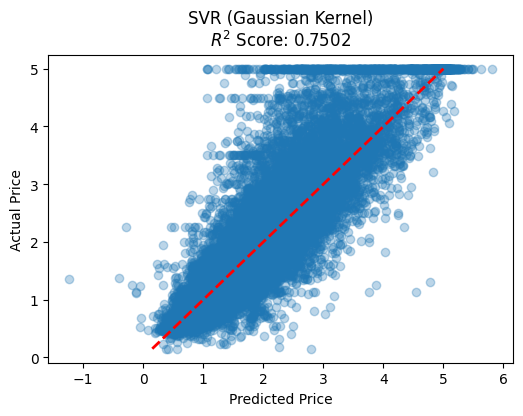

0.7502397399037288

In [ ]:
evaluate_and_plot(SVR(kernel='rbf'), X_scaled, y, "SVR (Gaussian Kernel)")

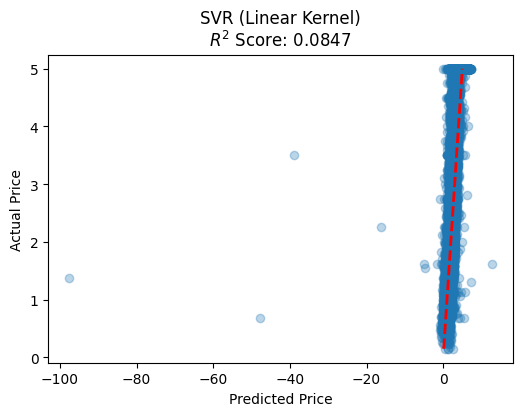

0.08467354540785244

In [30]:
evaluate_and_plot(SVR(kernel='linear'), X_scaled, y, "SVR (Linear Kernel)")

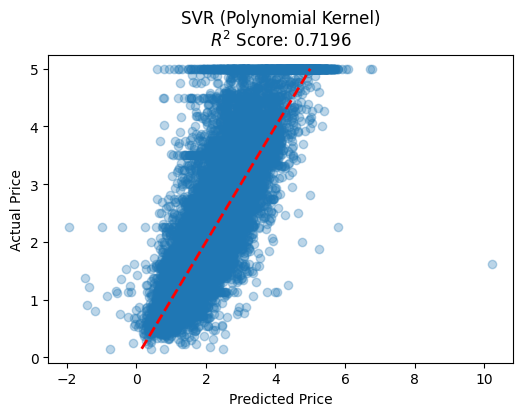

0.7196431640200758

In [31]:
evaluate_and_plot(SVR(kernel='poly', degree=3, coef0=1), X_scaled, y, "SVR (Polynomial Kernel)")

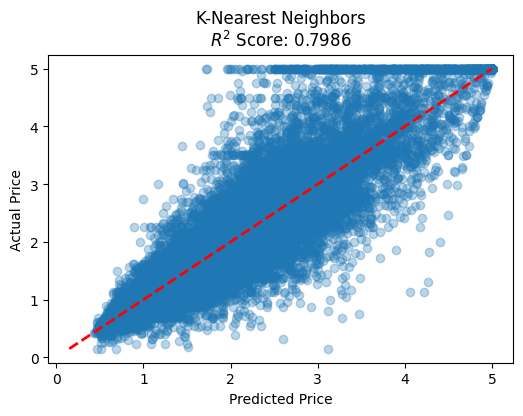

0.7985691404441082

In [22]:
evaluate_and_plot(KNeighborsRegressor(n_neighbors=5), X_scaled, y, "K-Nearest Neighbors")

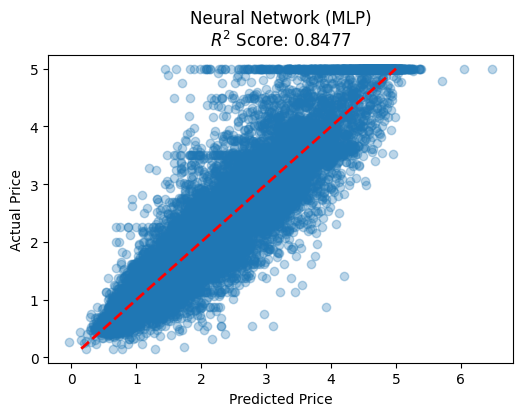

0.8477472400681765

In [23]:
evaluate_and_plot(MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500), X_scaled, y, "Neural Network (MLP)")

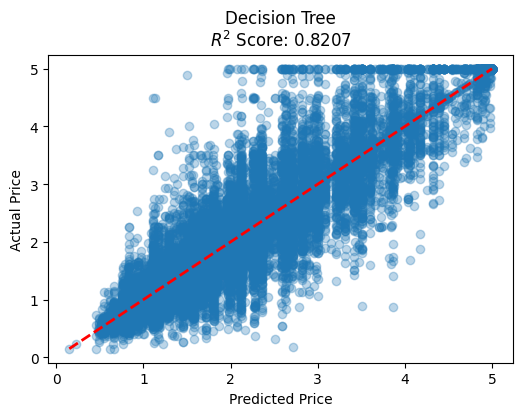

0.8206970165223321

In [24]:
evaluate_and_plot(DecisionTreeRegressor(max_depth=10), X, y, "Decision Tree")

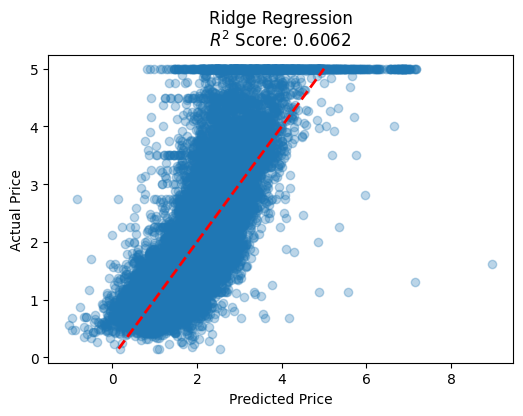

0.6062326414700454

In [25]:
evaluate_and_plot(Ridge(alpha=1.0), X_scaled, y, "Ridge Regression")

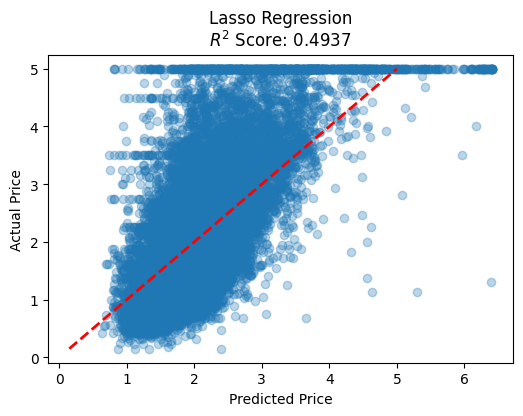

0.4937167743965204

In [26]:
evaluate_and_plot(Lasso(alpha=0.1), X_scaled, y, "Lasso Regression")

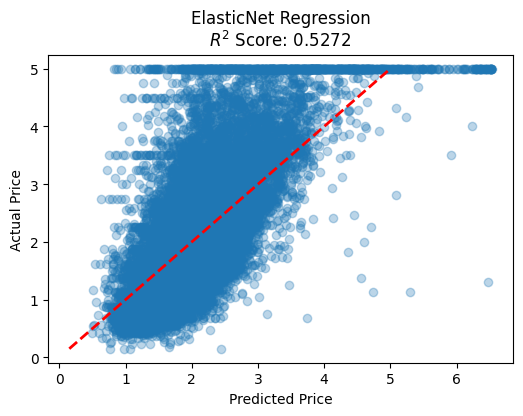

0.5272146087163414

In [27]:
evaluate_and_plot(ElasticNet(alpha=0.1, l1_ratio=0.5), X_scaled, y, "ElasticNet Regression")

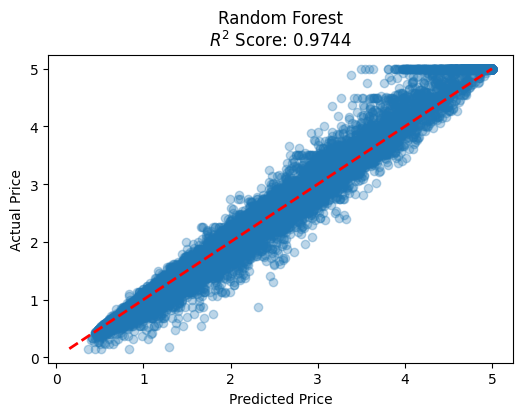

0.9743593686890561

In [28]:
evaluate_and_plot(RandomForestRegressor(n_estimators=100, n_jobs=-1), X, y, "Random Forest")

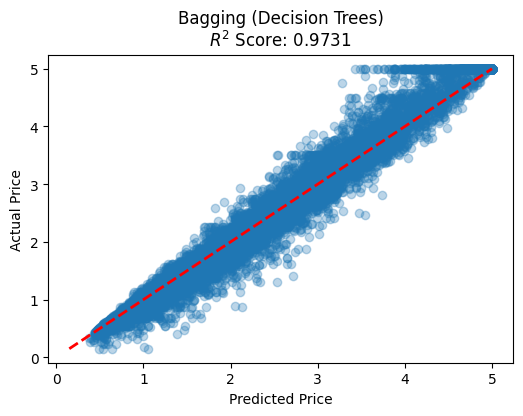

0.9731170873581498

In [29]:
evaluate_and_plot(BaggingRegressor(n_estimators=50, n_jobs=-1), X, y, "Bagging (Decision Trees)")